In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
missing_values = ["n/a", "na", "--"]
combined_df_task2=pd.read_csv("files/combined_df_for_task2.csv",na_values = missing_values)

In [3]:
QVI_data=pd.read_csv("files/QVI_data.csv",na_values = missing_values)

In [4]:
QVI_data["DATE"]=pd.to_datetime(QVI_data["DATE"])

In [5]:
QVI_data['year_filter']=QVI_data['DATE'].dt.year
QVI_data['month_filter']=QVI_data['DATE'].dt.month
QVI_data['yyyymm']=QVI_data['year_filter'].astype(str)+QVI_data['month_filter'].astype(str)

In [6]:
QVI_data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,year_filter,month_filter,yyyymm
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018,10,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018,9,20189
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019,3,20193
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019,3,20193
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018,11,201811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,2018,12,201812
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,2018,10,201810
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,2018,10,201810
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,2018,10,201810


Let's pick the control stores
Our trial stores are 77, 86, 88
Let's filter out the stores from before 2019 february.

In [7]:
QVI_data_control=QVI_data.loc[(QVI_data['year_filter']<2019)|(QVI_data['year_filter']==2019)& (QVI_data['month_filter']<2)]


What we want to calculate: <br>
monthly overall sales for each store <br>
monthly number of customers for each store <br>
monthly number of transactions per store per customer <br>

let's calculate these for our trial stores. Let's build a function to do that.

In [107]:
#function to get the averages
def find_monthly_numbers(storenumber):
    filter=pd.DataFrame(QVI_data_control.loc[(QVI_data_control['STORE_NBR']==storenumber)])
    monthly_sale=pd.DataFrame(filter.groupby(['yyyymm'])['TOT_SALES'].sum())
    monthly_customer=pd.DataFrame(filter.groupby(['yyyymm'])['LYLTY_CARD_NBR'].nunique())
    monthly_transaction=pd.DataFrame(filter.groupby(['yyyymm','LYLTY_CARD_NBR'])['TOT_SALES'].sum())
    return monthly_sale,monthly_customer,monthly_transaction
#function to visualise the results
def create_graph(dataframe_to_visualise):
    fig,ax=plt.subplots()
    ax.plot(dataframe_to_visualise.index,dataframe_to_visualise.iloc[:,0])
    ax.set_xlabel(dataframe_to_visualise.index.name)
    ax.set_ylabel(dataframe_to_visualise.columns[0])

In [108]:
x,y,z=find_monthly_numbers(77)
#create_graph(x)
#create_graph(y)
x2,y2,z2=find_monthly_numbers(86)
#create_graph(x2)
#create_graph(y2)
x3,y3,z3=find_monthly_numbers(88)
#create_graph(x3)
#create_graph(y3)


When we visualise the results we can see that monthly number of customers and monthly transactions follow a similar pattern.

Let's calculate
monthly overall sales for each store
monthly number of customers for each store
monthly number of transactions per store per customer
monthly chips per customer
average price per unit

In [109]:
#monthly overall sales for each store
overall_sales_control=QVI_data_control.groupby(['yyyymm','STORE_NBR'])['TOT_SALES'].sum()
overall_sales_control=pd.DataFrame(overall_sales_control)

In [129]:
overall_sales_control=overall_sales_control.unstack()
overall_sales_control

TOT_SALES                                                       \
STORE_NBR       1      2        3       4      5      6       7      8     
yyyymm                                                                     
201810        188.1  167.8  1037.90  1346.4  798.0  292.4  1063.9  422.8   
201811        192.6  162.9  1008.00  1212.0  771.4  255.3  1076.5  349.2   
201812        189.6  136.0  1121.60  1185.6  879.2  209.1   906.1  356.4   
20187         206.9  150.8  1205.70  1399.9  812.0  260.0  1024.7  381.6   
20188         176.1  193.8  1079.75  1259.5  745.1  203.2  1119.9  383.0   
20189         278.8  154.4  1021.50  1198.6  896.0  207.7  1147.3  293.0   
20191         154.8  162.8  1051.70  1525.0  838.0  191.1   975.1  445.0   

                          ...                                           \
STORE_NBR    9       10   ...   263    264    265    266   267     268   
yyyymm                    ...                                            
201810     361.0  910.80  ...  36.6  170.0  162.9  170.4  14.4  237.60   
201811     374.4  885.00  ...  15.8  184.5  282.8  144.2  40.3  225.40   
201812     382.6  936.60  ...  24.6  288.5  205.3  157.8  15.4  207.30   
20187      289.7  892.00  ...  38.7  232.6  247.8  127.3   6.2  224.00   
20188      327.5  878.65  ...  28.0  203.3  227.1  154.5  24.9  322.65   
20189      369.7  945.00  ...  21.8  199.5  133.5  139.0  23.3  174.40   
20191      399.4  878.60  ...  21.3  247.3  176.7  148.7  34.4  157.70   

                                           
STORE_NBR     269      270    271     272  
yyyymm                                     
201810     1078.4   816.40  790.0  430.60  
201811      967.2   965.00  886.4  376.20  
201812      935.4  1038.00  807.4  403.90  
20187       982.0   962.80  956.6  433.10  
20188       835.1  1003.75  683.9  372.85  
20189       886.0   845.40  798.4  304.70  
20191       980.4  1066.60  842.4  423.00  

[7 rows x 271 columns]

we are looking for control stores for 77,86 and 88. Let's start with 77

In [188]:
#s = overall_sales_control.corrwith(overall_sales_control.iloc[:, 77])
#s=s.unstack()
#s=s.unstack()
#s=pd.DataFrame(s)
s.scatterplot()


AttributeError: 'DataFrame' object has no attribute 'scatterplot'

In [168]:
def find_correlation(store_number):
    corr_with_trial_store = overall_sales_control.corrwith(overall_sales_control.iloc[:, (store_number-1)])
    corr_with_trial_store=pd.DataFrame(corr_with_trial_store)
    return corr_with_trial_store
    plt.scatter(corr_with_trial_store[-1], corr_with_trial_store[-2])


    
find_correlation(77)




/Users/nisanbaysal/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/nisanbaysal/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


0
          STORE_NBR          
TOT_SALES 1          0.075218
          2         -0.263079
          3          0.806644
          4         -0.263300
          5         -0.110652
...                       ...
          268        0.344757
          269       -0.315730
          270        0.315430
          271        0.355487
          272        0.117622

[271 rows x 1 columns]

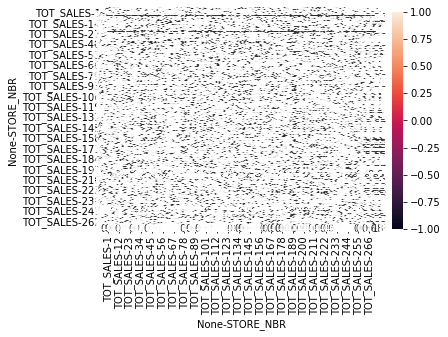

In [154]:
def find_correlation(storenumber):
    corr_matrix = overall_sales_control.corr()
    #store_column = overall_sales_control.columns[storenumber-1]
    #store_correlations = corr_matrix[store_column]
    sns.heatmap(corr_matrix, annot=True)
    
find_correlation(77)

#    for x in range(0,7):
        for y in range(0,271):
            corr=overall_sales_control.iloc[:,(storenumber-1)].corr(overall_sales_control.iloc[:,x])
#        corr=overall_sales_control.iloc[:,(storenumber-1)].corr(overall_sales_control.iloc[:,x])
#find_correlation(72)

In [138]:
for x in range(0,271):
    for y in range(0,271):
        corr = overall_sales_control.iloc[:,x].corr(overall_sales_control.iloc[:,y])
        new_dataframe = pd.DataFrame()
        new_dataframe[x,y]=corr
print(new_dataframe)


/Users/nisanbaysal/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/nisanbaysal/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Empty DataFrame
Columns: [(270, 270)]
Index: []


In [110]:
a=overall_sales_control['STORE_NBR'].nunique()
print(a)

KeyError: 'STORE_NBR'

In [ ]:
corr = s1.corr(s2)

In [91]:
#monthly number of customer for each store
customer_number_control=QVI_data_control.groupby(['yyyymm','STORE_NBR'])['LYLTY_CARD_NBR'].nunique()
#customer_number_control=pd.DataFrame(customer_number_control)

In [96]:
#monthly number of transactions per store per customer
customer_transaction_control=QVI_data_control.groupby(['yyyymm','STORE_NBR','LYLTY_CARD_NBR'])['TOT_SALES'].sum()
#customer_transaction_control=pd.DataFrame(customer_transaction_control)

In [98]:
#monthly chips per customer
chips_per_customer=QVI_data_control.groupby(['yyyymm','STORE_NBR','LYLTY_CARD_NBR'])['PROD_QTY'].sum()
#chips_per_customer=pd.DataFrame(chips_per_customer)

Now let's calculate the correlation of stores with trial stores